# Asymp version of fig 5

Asymp

In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [2]:
import pandas as pd

import seaborn as sns

from matplotlib.colors import BoundaryNorm

import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt


from plots2.fns import (
    get_corner_annotations,
)


from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
    SHAP_BLUE,
)

from poly2.utils import (
    object_load, 
)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


# Load SHAP values

In [3]:
shap_values = object_load('../outputs/SHAP/asymp.pickle')

# Fig

In [4]:
shap_values.values.min(), shap_values.values.max()

(-0.46795547, 0.5773037)

In [5]:
ymin = -0.5
ymax = 0.60

Wall time: 17.6 s


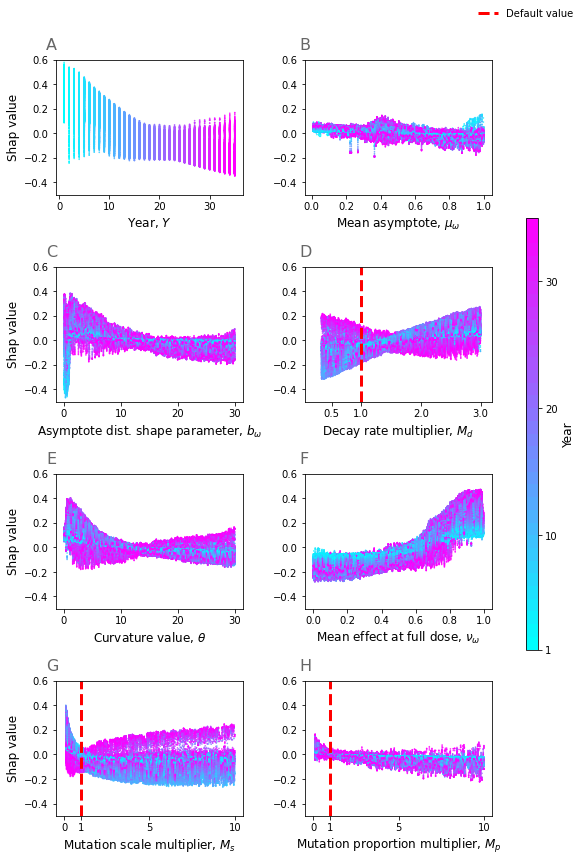

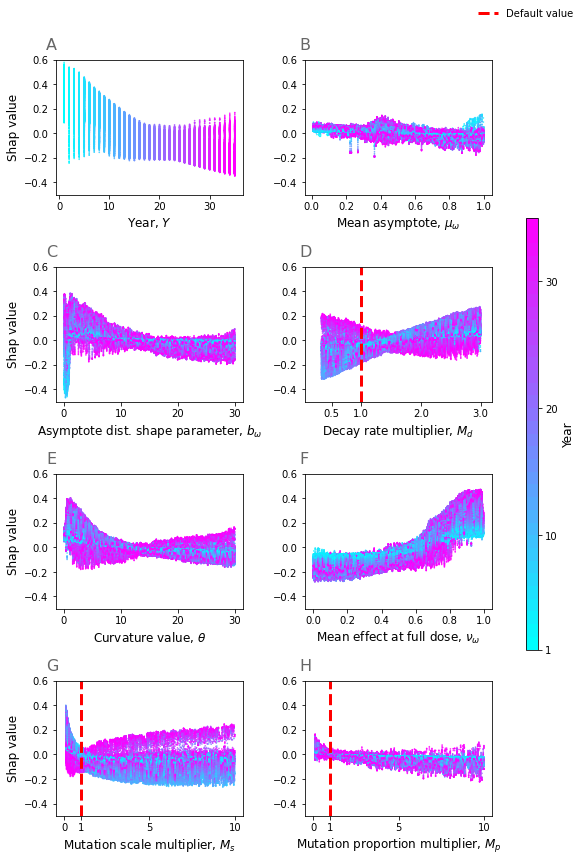

In [6]:
%%time

plt.close('all')

plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_FONT)  # fontsize of the figure title


f, ax = plt.subplots(4, 2, figsize=(8, 12))

alpha = 0.8
size = 0.4

# DATA

clrmap = plt.cm.cool  # define the colormap
cmaplist = [clrmap(i) for i in range(clrmap.N)]

cm3 = LinearSegmentedColormap.from_list("", cmaplist, clrmap.N)

bounds = np.linspace(1, 35, 35)
norm = BoundaryNorm(bounds, clrmap.N)

cmap3 = ScalarMappable(cmap=cm3, norm=norm)


colors3 = cmap3.to_rgba(shap_values[:, 'year'].data)

# A
ax[0][0].scatter(
    shap_values[:, "year"].data,
    shap_values[:, "year"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

# B
ax[0][1].scatter(
    shap_values[:, "asymp_mu"].data,
    shap_values[:, "asymp_mu"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

# C
ax[1][0].scatter(
    shap_values[:, "asymp_b"].data,
    shap_values[:, "asymp_b"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

# D
ax[1][1].scatter(
    shap_values[:, "dec_rate"].data,
    shap_values[:, "dec_rate"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

# E
ax[2][0].scatter(
    shap_values[:, "curv"].data,
    shap_values[:, "curv"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

# F
ax[2][1].scatter(
    shap_values[:, "nu"].data,
    shap_values[:, "nu"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)


# G
ax[3][0].scatter(
    shap_values[:, "m_scale"].data,
    shap_values[:, "m_scale"].values,
    alpha=alpha, 
    color=colors3, 
    s=size,
)

# H
ax[3][1].scatter(
    shap_values[:, "m_prop"].data, 
    shap_values[:, "m_prop"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)




# LAYOUT

# A
ax[0][0].set_xlabel(r'Year, $Y$')


# B
ax[0][1].set_xlabel(r'Mean asymptote, $\mu_{\omega}$')
# ax[0][1].axvline(cf.k_b, color='r', label='Default value', ls='--', lw=3)


# C
ax[1][0].set_xlabel(r'Asymptote dist. shape parameter, $b_{\omega}$')
# ax[1][0].set_xlim([-0.05,1.05])
# ax[1][0].axvline(1, color='r', ls='--', lw=3)


# D
ax[1][1].set_xlabel(r'Decay rate multiplier, $M_d$')
ax[1][1].set_xlim([0.05, 3.2])
ax[1][1].set_xticks([0.5, 1, 2, 3])
ax[1][1].axvline(1, color='r', ls='--', lw=3, label='Default value')

# E
ax[2][0].set_xlabel(r'Curvature value, $\theta$')
# ax[2][0].axvline(cf.k_mu, color='r', ls='--', lw=3)


# F
ax[2][1].set_xlabel(r'Mean effect at full dose, $\nu_{\omega}$')
ax[2][1].set_xlim([-0.05,1.05])
# ax[2][1].axvline(max_effect_mean, color='r', ls='--', lw=3)


# G
ax[3][0].set_xlabel(r'Mutation scale multiplier, $M_s$')
ax[3][0].set_xlim([-0.5,10.5])
ax[3][0].set_xticks([0, 1, 5, 10])
ax[3][0].axvline(1, color='r', ls='--', lw=3)


# H
ax[3][1].set_xlabel(r'Mutation proportion multiplier, $M_p$')
ax[3][1].set_xlim([-0.5,10.5])
ax[3][1].set_xticks([0, 1, 5, 10])
ax[3][1].axvline(1, color='r', ls='--', lw=3)


for ii, jj in itertools.product(np.arange(4), np.arange(2)):
    ax[ii][jj].spines['top'].set_visible(True)
    ax[ii][jj].spines['right'].set_visible(True)
    

    ax[ii][jj].set_ylim([ymin, ymax])
    
    if jj==0:
        ax[ii][jj].set_ylabel('Shap value')
    else:
        ax[ii][jj].set_ylabel('')




f.patch.set_facecolor('white')

f.align_ylabels()

plt.tight_layout(rect=[0, 0, 0.88, 0.95], h_pad=3, w_pad=3)

xx = 0.92
dx = 0.02
dy = 0.3

cax3 = plt.axes([xx, 0.25, dx, 0.5])
plt.colorbar(cmap3, cax=cax3, label='Year', ticks=[1, 10, 20, 30])

get_corner_annotations(2, 4, 0.08, 0.94, 0.44, 0.2395, plt)

f.legend(
    loc=1,
    framealpha=0,
)

f

In [7]:
f.savefig('../figures/paper/app6_fig4.jpg', dpi=1200)